In [ ]:
import tensorflow as tf
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
# For reading in images and image manipulation
import cv2
# For label encoding the target variable
from sklearn.preprocessing import LabelEncoder
# For tensor based operations
from tensorflow.keras.utils import to_categorical, normalize
# For Machine Learning
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
DATA_DIR ='/content/drive/MyDrive/Colab Notebooks/chest_xray/'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'Train')
VALID_DATA_DIR = os.path.join(DATA_DIR, 'valid')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'Test')

In [ ]:
IMG_SIZE = 224
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)



['PNEUMONIA', 'NORMAL']


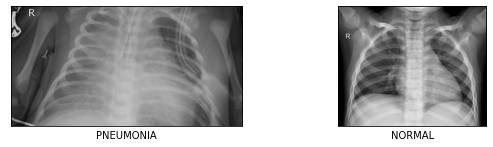

In [ ]:


plt.figure(figsize=(20,20))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(10,5,i+1)
        plt.imshow(img_array)
        plt.xlabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        break

plt.tight_layout()        
plt.show()



In [ ]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) #'/content/drive/MyDrive/Colab Notebooks/chest_xray/'
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            training_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
        except Exception as e:
            pass
        
print(len(training_data))

100%|██████████| 1341/1341 [01:40<00:00, 13.36it/s]

2847


In [ ]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            test_data.append([img_resized, class_num])
        except Exception as e:
            pass
        
print(len(test_data))



100%|██████████| 234/234 [00:10<00:00, 21.86it/s]

624


In [ ]:
random.shuffle(training_data)
random.shuffle(test_data)

In [ ]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,224,224,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (2847, 224, 224, 3) Y_train= (2847,)


In [ ]:


X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")



X_test= (624, 224, 224, 3) Y_test= (624,)


In [ ]:
mean_rgb = np.mean(X_train, axis=(0,1,2))
print(mean_rgb)

[30.06605 30.06605 30.06605]


In [ ]:
X_train_norm = np.empty_like(X_train)
X_test_norm = np.empty_like(X_test)
for i in range(len(X_train)):
    for c in range(3):
        if(c==1):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[1]
        else:
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[2]
            
for i in range(len(X_test)):
    for c in range(3):
        if(c==1):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[1]
        else:
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[2]



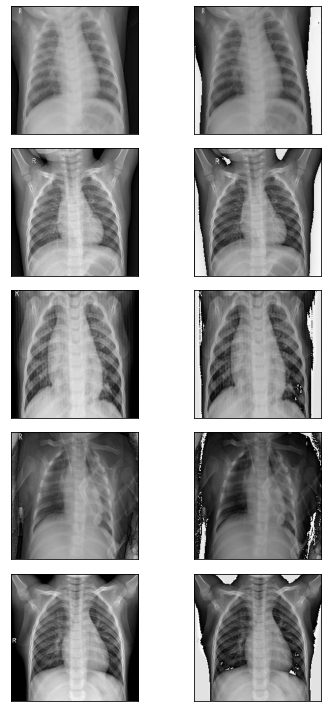

In [ ]:
import matplotlib.pyplot as plt
c = 0
plt.figure(figsize=(6,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    c += 2
    
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Initializing a sequential keras model
        model = keras.Sequential()

# Adding a 2D convolution layer
          model.add(
            Conv2D(
            filters=100,
            kernel_size=(3, 3),
            use_bias=True,
      
            activation="relu",
            strides=2,
             )
           )

# Adding a max-pooling layer
         model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a 2D convolution layer - Output Shape = 10 x 10 x 64
         model.add(Conv2D(filters=64, kernel_size=(3, 3), use_bias=True, activation="relu"))

# Adding a max-pooling layer - Output Shape = 5 x 5 x 64
         model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a flatten layer - Output Shape = 5 x 5 x 64 = 1600
         model.add(Flatten())

# Adding a dense layer - Output Shape = 50
        model.add(Dense(50, activation="relu"))

# Adding a dropout
        model.add(Dropout(0.2))

# Adding a dense layer with softmax activation
        model.add(Dense(2, activation="softmax"))


In [ ]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.02, patience=3, restore_best_weights=True)
h=model.fit(x=X_train_norm, y=Y_train, 
              epochs=20, 
              validation_split=0.2,
              batch_size=64,
              callbacks=[cb])

Epoch 1/20
36/36 [==============================] - 93s 3s/step - loss: 33.2319 - accuracy: 0.7576 - val_loss: 0.5990 - val_accuracy: 0.8719
Epoch 2/20
36/36 [==============================] - 91s 3s/step - loss: 0.2451 - accuracy: 0.9188 - val_loss: 0.1965 - val_accuracy: 0.9316
Epoch 3/20
36/36 [==============================] - 90s 3s/step - loss: 0.1193 - accuracy: 0.9561 - val_loss: 0.2127 - val_accuracy: 0.9175
Epoch 4/20
36/36 [==============================] - 93s 3s/step - loss: 0.0542 - accuracy: 0.9838 - val_loss: 0.1727 - val_accuracy: 0.9456
Epoch 5/20
36/36 [==============================] - 91s 3s/step - loss: 0.0694 - accuracy: 0.9772 - val_loss: 0.2121 - val_accuracy: 0.9368
Epoch 6/20
36/36 [==============================] - 92s 3s/step - loss: 0.0388 - accuracy: 0.9868 - val_loss: 0.1730 - val_accuracy: 0.9404
Epoch 7/20
36/36 [==============================] - 93s 3s/step - loss: 0.0231 - accuracy: 0.9917 - val_loss: 0.1425 - val_accuracy: 0.9561
Epoch 8/20
36/36 [=

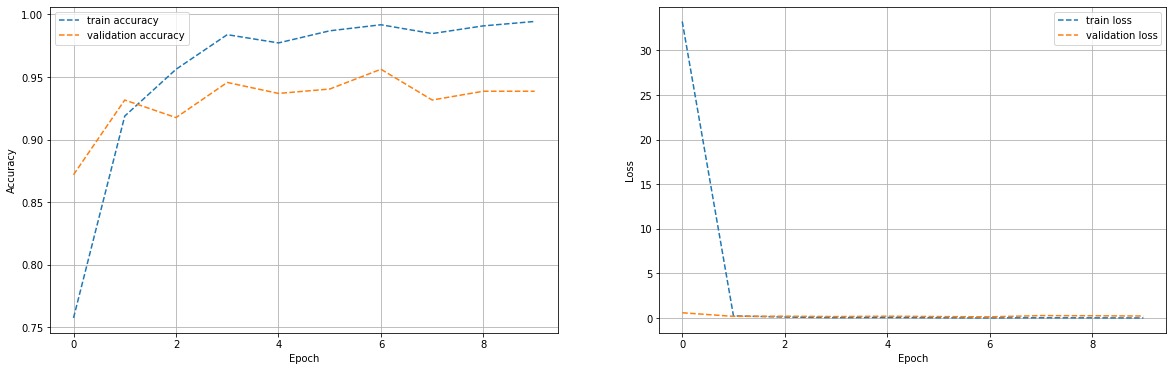

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()